## Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[]

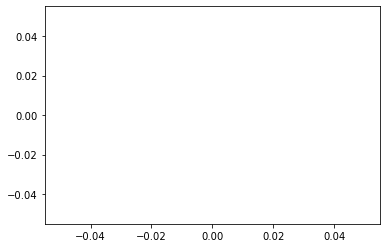

In [2]:
plt.plot()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

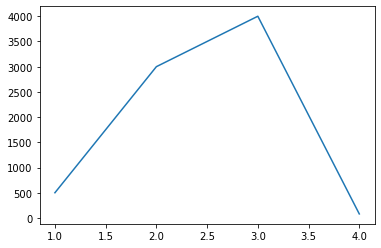

In [10]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
fig, ax = plt.subplots()
ax.plot(x, [500, 3000, 4000, 80])
type(fig), type(ax)

### Example workflow

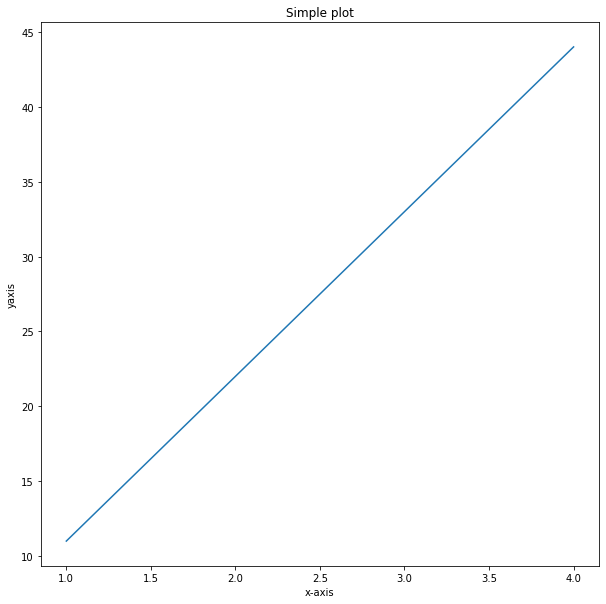

In [11]:
# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) #(width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple plot", xlabel="x-axis", ylabel="yaxis")

# 5. Save & show
fig.savefig('sampleplot.png')

### Making figures with NumPy arrays

In [17]:
x = np.linspace(0, 10, 100) # evenly space
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

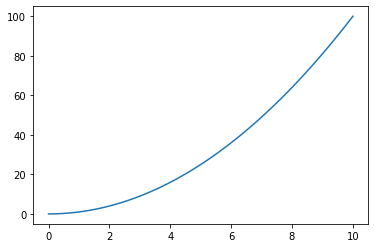

In [18]:
fig, ax = plt.subplots()
ax.plot(x, x**2)

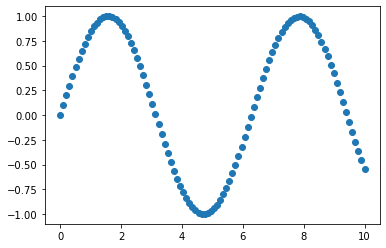

In [25]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

[Text(0.5, 1.0, 'Store'), Text(0, 0.5, 'Dollar')]

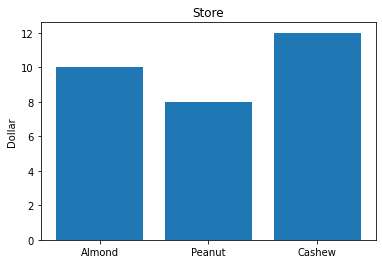

In [27]:
fig, ax = plt.subplots()
price = {"Almond": 10, "Peanut": 8, "Cashew": 12}
ax.bar(price.keys(), price.values())
ax.set(title="Store", ylabel="Dollar")

In [34]:
x = np.linspace(0, 10, 100) # evenly space

(array([1., 1., 1., 0., 3., 1., 0., 1., 1., 1.]),
 array([0.14619132, 0.22186639, 0.29754147, 0.37321654, 0.44889162,
        0.52456669, 0.60024177, 0.67591684, 0.75159191, 0.82726699,
        0.90294206]),
 <BarContainer object of 10 artists>)

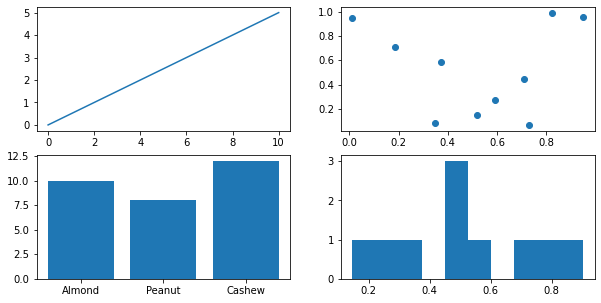

In [35]:
# Subplot option 1

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(price.keys(), price.values())
ax4.hist(np.random.random(10))

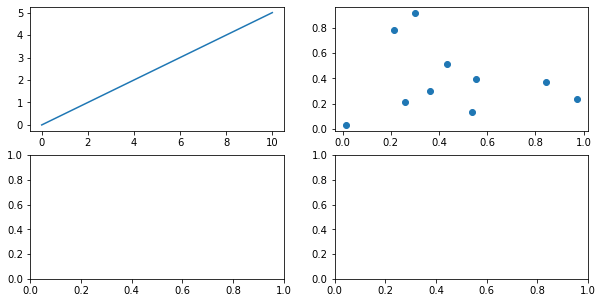

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))

<AxesSubplot:>

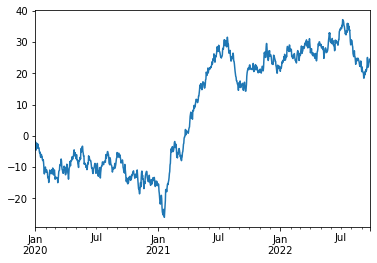

In [42]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))

ts = ts.cumsum()
ts.plot()

In [11]:
car_sales = pd.read_csv("car-sales.csv")
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales["Price"] = car_sales["Price"].str[:-2].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [13]:
car_sales["Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales["Total"] = car_sales["Price"].cumsum()

<AxesSubplot:xlabel='Date'>

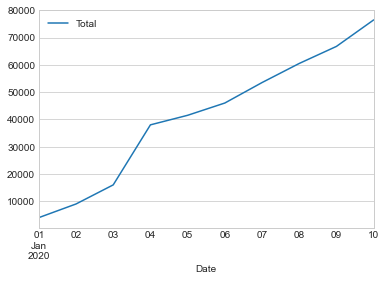

In [14]:
car_sales.plot(x="Date", y="Total")

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

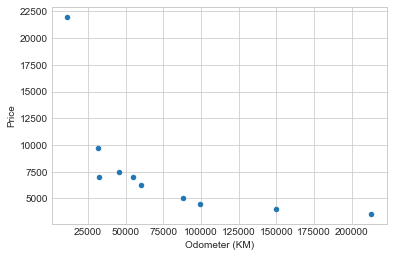

In [17]:
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

<AxesSubplot:>

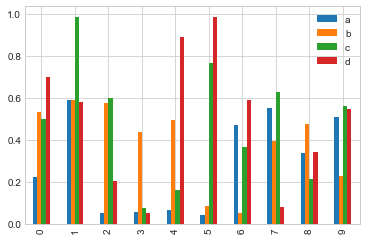

In [15]:
x = np.random.rand(10, 4)

df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df.plot.bar()

<AxesSubplot:xlabel='Make'>

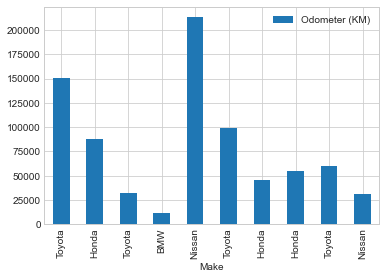

In [16]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")

<AxesSubplot:ylabel='Frequency'>

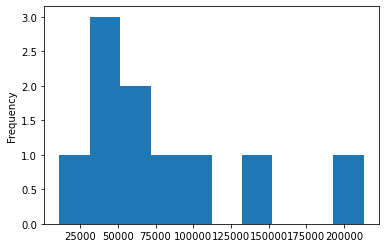

In [21]:
car_sales["Odometer (KM)"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

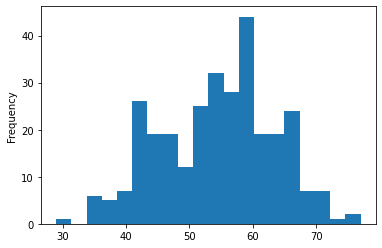

In [25]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease['age'].plot.hist(bins=20)

## Pyplot vs Matplotlib OO method
- When plotting something quickly. okay to use Pyplot method
- When plotting something more advanced, use the OO method 

In [36]:
heart_disease = pd.read_csv('heart-disease.csv')
over_50 = heart_disease[heart_disease["age"] > 50]
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='age', ylabel='chol'>

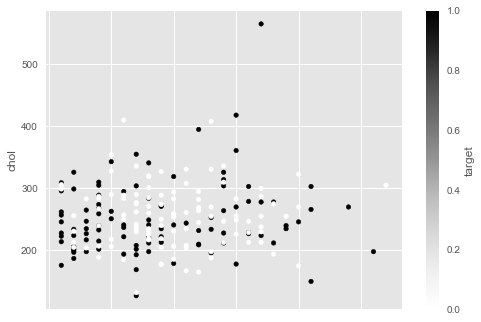

In [37]:
# Pyplot method

over_50.plot(kind='scatter', x='age', y='chol', c='target')

<AxesSubplot:xlabel='age', ylabel='chol'>

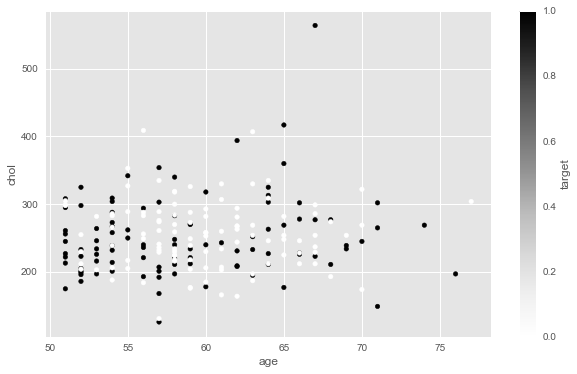

In [38]:
# OO method with pyplot

fix, ax = plt.subplots(figsize = (10, 6))
over_50.plot(kind='scatter', x='age', y='chol', c='target', ax=ax)

# ax.set_xlim([45, 80])

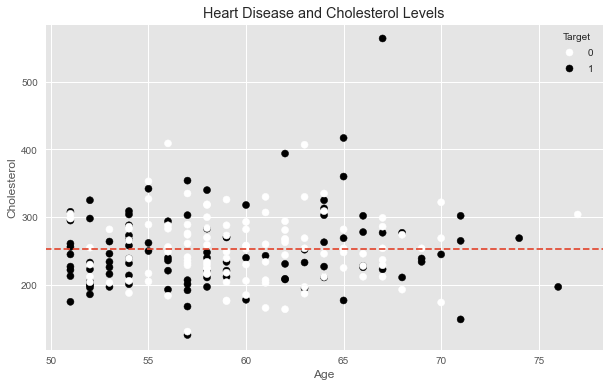

In [39]:
fix, ax = plt.subplots(figsize = (10, 6))

scatter = ax.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'])
ax.set(title='Heart Disease and Cholesterol Levels', xlabel="Age", ylabel='Cholesterol')


# Add a legend
ax.legend(*scatter.legend_elements(), title="Target")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle='--')

Text(0.5, 0.98, 'Heart Disease Analysis')

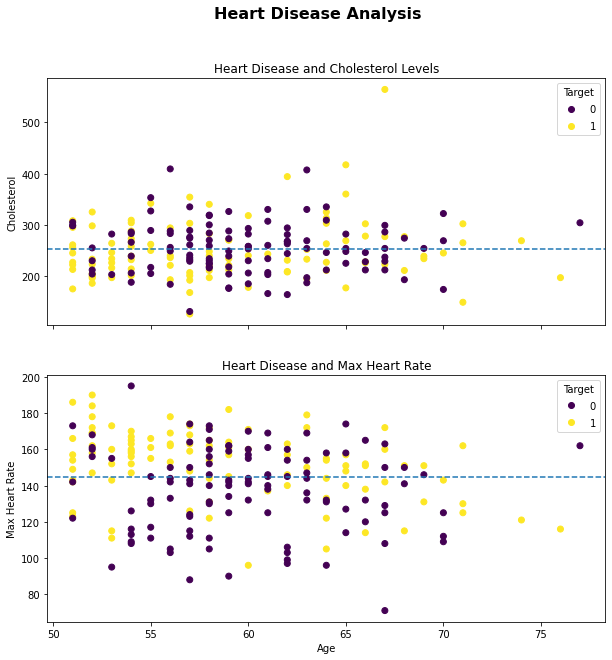

In [60]:
# Subplot of chol, age, thalach

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'])
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel='Cholesterol')
ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(over_50['chol'].mean(), linestyle='--')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target'])
ax1.set(title="Heart Disease and Max Heart Rate", xlabel='Age', ylabel='Max Heart Rate')
ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

In [22]:
# See the different styles available

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:>

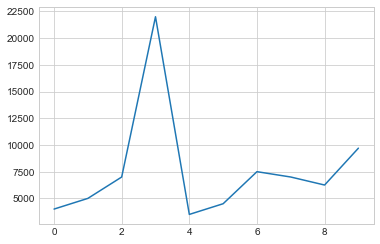

In [20]:
plt.style.use('seaborn-whitegrid')
car_sales['Price'].plot()

<AxesSubplot:>

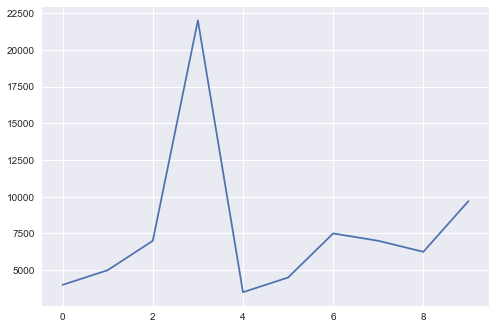

In [21]:
plt.style.use('seaborn')
car_sales['Price'].plot()

<AxesSubplot:>

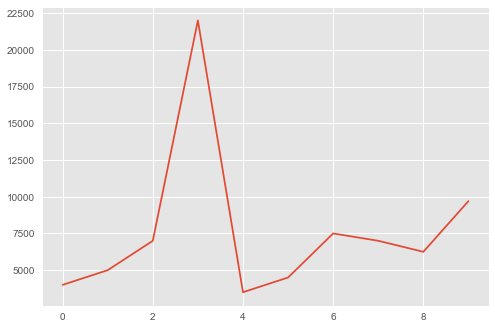

In [23]:
plt.style.use('ggplot')
car_sales['Price'].plot()

In [30]:
x = np.random.randn(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.522432,-1.130587,-0.409334,-0.125271
1,-0.547319,0.337008,-0.110564,0.504070
2,1.434685,0.155640,0.046779,-1.242773
3,0.568800,0.028281,0.248637,0.362827
4,-0.262235,-0.050884,1.378963,-0.040174
5,0.718861,2.251208,1.780304,0.285857
6,-1.584436,0.087981,-2.501440,1.622118
7,-0.779989,-0.129548,0.957188,-1.097041
8,-0.818326,-1.478921,-3.390728,-0.722895
9,-0.734047,0.684777,0.678944,0.376582


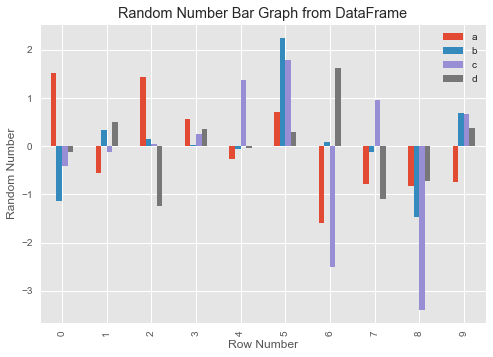

In [34]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", xlabel='Row Number', ylabel='Random Number')
ax.legend().set_visible(True)

Text(0.5, 0.98, 'Heart Disease Analysis')

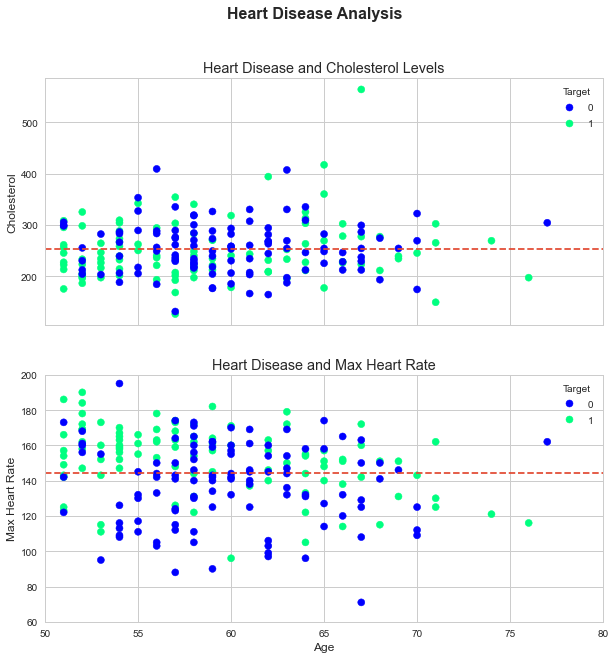

In [48]:
plt.style.use('seaborn-whitegrid')

# Subplot of chol, age, thalach

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'], cmap='winter')
ax0.set_xlim([50, 80])
ax0.set(title="Heart Disease and Cholesterol Levels", ylabel='Cholesterol')
ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(over_50['chol'].mean(), linestyle='--')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target'], cmap='winter')
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])
ax1.set(title="Heart Disease and Max Heart Rate", xlabel='Age', ylabel='Max Heart Rate')
ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

### Save figure

In [49]:
fig.savefig('heart-disease-analysis-plot-saved-with-code.png')